# IRIS FLOWER CLASSIFICATION BASED ON LOGISTIC REGRESSION AND SVM

# importing required libraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
warnings.simplefilter("ignore")

# loading dataset

In [3]:
dataset=load_iris()

In [4]:
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
dir(dataset)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
column=dataset.feature_names
column

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris=pd.DataFrame(dataset.data,columns=column)

In [8]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [13]:
iris['target']=dataset.target

In [15]:
iris['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [16]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [20]:
iris['flower type']=iris.target.apply(lambda x:dataset.target_names[x])

In [21]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower type
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [22]:
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower type
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [23]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   flower type        150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [24]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# checking null values

In [25]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
flower type          0
dtype: int64

# visualization

[Text(0.5, 1.0, 'Counts of different flower types')]

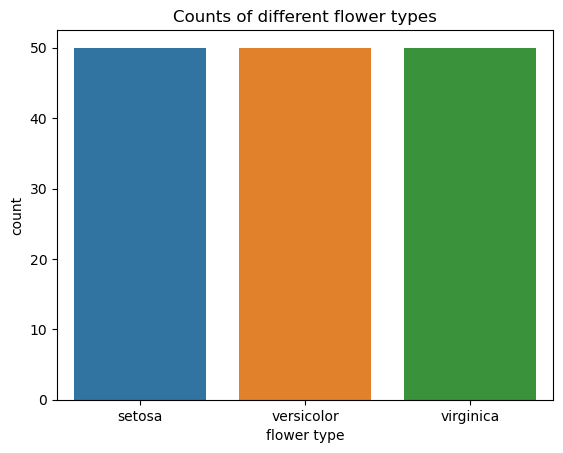

In [26]:
sns.countplot(x=iris['flower type']).set(title="Counts of different flower types")

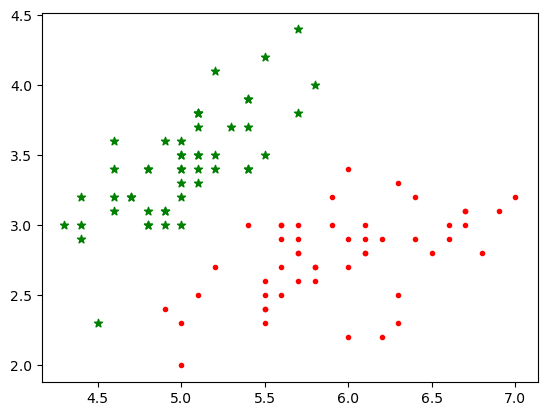

In [27]:
df0 = iris[iris.target==0]
df1 = iris[iris.target==1]
df2 = iris[iris.target==2]
plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],color="green",marker="*")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color="red",marker=".")


In [28]:
x=iris.iloc[:,:4]

In [29]:
y=iris['flower type']

In [30]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: flower type, Length: 150, dtype: object

# Spliting Dataset into training and testing

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=4)

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [34]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
86,6.7,3.1,4.7,1.5
46,5.1,3.8,1.6,0.2
135,7.7,3.0,6.1,2.3
7,5.0,3.4,1.5,0.2
65,6.7,3.1,4.4,1.4
...,...,...,...,...
50,7.0,3.2,4.7,1.4
87,6.3,2.3,4.4,1.3
104,6.5,3.0,5.8,2.2
129,7.2,3.0,5.8,1.6


In [35]:
y_test

128     virginica
18         setosa
130     virginica
105     virginica
107     virginica
78     versicolor
83     versicolor
14         setosa
5          setosa
133     virginica
25         setosa
11         setosa
12         setosa
63     versicolor
113     virginica
34         setosa
60     versicolor
2          setosa
24         setosa
123     virginica
35         setosa
124     virginica
68     versicolor
26         setosa
29         setosa
19         setosa
41         setosa
16         setosa
20         setosa
101     virginica
84     versicolor
47         setosa
108     virginica
1          setosa
93     versicolor
144     virginica
125     virginica
92     versicolor
Name: flower type, dtype: object

# Logistic Regression

In [36]:
model1=LogisticRegression()

# SVM

In [37]:
model2=SVC(kernel="linear",C=1.0)

# Training Model

In [38]:
logistic=model1.fit(x_train,y_train)

In [39]:
Svm=model2.fit(x_train,y_train)

# Predicting Values

In [40]:
y1_pred=model1.predict(x_test)

In [41]:
y2_pred=model2.predict(x_test)

# Accuracy Score

In [42]:
score1=accuracy_score(y_test,y1_pred)
score1

0.9736842105263158

In [43]:
score2=accuracy_score(y_test,y2_pred)
score2

0.9736842105263158

# classification report

In [44]:
classificationreport1=classification_report(y_test,y1_pred)
print(classificationreport1)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.88      0.93         8
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.96      0.96        38
weighted avg       0.98      0.97      0.97        38



In [45]:
classificationreport2=classification_report(y_test,y2_pred)
print(classificationreport2)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.88      0.93         8
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.96      0.96        38
weighted avg       0.98      0.97      0.97        38



In [46]:
x_label=['logistic regression','svm']
y_label=[score1,score2]

# showing score difference between logistic regression and svm

<AxesSubplot:>

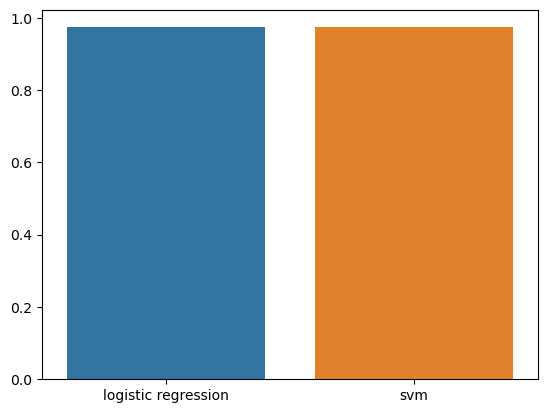

In [47]:
sns.barplot(x=x_label,y=y_label)